### Метод главных компонент

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.model_selection import validation_curve

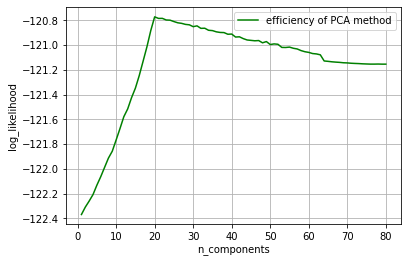

Best number of components to keep: 20


In [2]:
data = pd.read_csv('data_task1.csv')
D = data.shape[1]
d = np.arange(1,D+1)
model = PCA()
test, train = validation_curve(model, data, None, param_name = "n_components", param_range = d)
scores = train.mean(axis = 1)
plt.plot(d,scores, c = 'g', label = 'efficiency of PCA method')
plt.legend()
plt.xlabel("n_components")
plt.ylabel("log_likelihood")
plt.grid()
plt.show()
print("Best number of components to keep: %s" %(np.argmax(scores)+1))

(100,)
Количество эффективной размерности пр-ва: 30


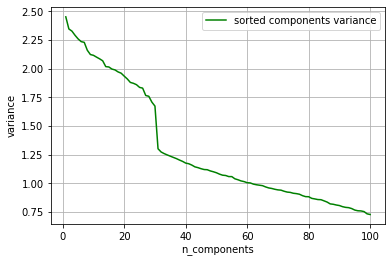

In [3]:
data = pd.read_csv('data_task2.csv')

model = PCA(n_components = data.shape[1])
model.fit_transform(data)
variance = model.explained_variance_
print(variance.shape)
var_difference = [(variance[i] - variance[i+1]) for i in range (variance.shape[0]-1)]
num_effective_dimensions = np.argmax(var_difference)+1
print("Количество эффективной размерности пр-ва: %s" %num_effective_dimensions)
d = np.arange(1,data.shape[1]+1)
plt.plot(d,variance[:], c = 'g', label = "sorted components variance")
plt.legend()
plt.xlabel("n_components")
plt.ylabel("variance")
plt.grid()
plt.show()

In [4]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
print(data.DESCR)
model = PCA()
data_transformed = model.fit_transform(X)
print(data_transformed[:5])
print(X[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

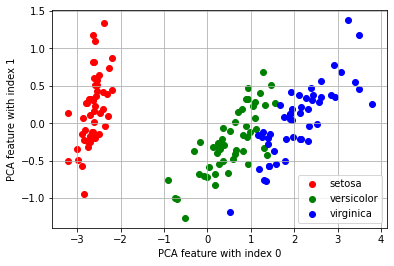

In [5]:
from scipy.stats import pearsonr

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.xlabel("PCA feature with index 0")
    plt.ylabel("PCA feature with index 1")
    plt.grid()
    plt.show()
plot_iris(data_transformed, data.target, data.target_names)

pears_cor = []
for i in range(data_transformed.shape[1]):
    corr_1 = pearsonr(X[:,i]-X[:,i].mean(),data_transformed[:,0]-data_transformed[:,0].mean())
    corr_2 = pearsonr(X[:,i]-X[:,i].mean(),data_transformed[:,1]-data_transformed[:,1].mean())
    pears_cor.append([corr_1[0],corr_2[0]])

In [6]:
features_corr_1comp = []
features_corr_2comp = []
for i in range (data_transformed.shape[1]):
    index = np.argmax(pears_cor[i])
    if index == 0:
        features_corr_1comp.append([index,pears_cor[i][index]])
        print("Feature with index {0} corrilate with PCA feature with index {1}. Correlation value: {2}".format(i,index,pears_cor[i][index]))
    else:
        features_corr_2comp.append([index,pears_cor[i][index]])
        print("Feature with index {0} corrilate with PCA feature with index {1}. Correlation value: {2}".format(i,index,pears_cor[i][index]))

Feature with index 0 corrilate with PCA feature with index 0. Correlation value: 0.8974017619582986
Feature with index 1 corrilate with PCA feature with index 1. Correlation value: 0.8252287092319985
Feature with index 2 corrilate with PCA feature with index 0. Correlation value: 0.9978739422413112
Feature with index 3 corrilate with PCA feature with index 0. Correlation value: 0.9665475167033069


In [7]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
data = faces.data
model = PCA(n_components = 10)
data_transformed = model.fit_transform(data)

In [8]:
def cosine_sq(denominator, component, mean):
    return [((component[i]-mean)**2)/denominator for i in range (len(component)) ]

contribution_to_the_components = []

for i in range (data_transformed.shape[0]):
    denominator = sum((data_transformed[i,:]-data_transformed[i,:].mean())**2)
    contribution_to_the_components.append(cosine_sq(denominator,data_transformed[i,:],data_transformed[i,:].mean()))
print(contribution_to_the_components)

[[0.5384155044730804, 2.2873100820582046e-05, 0.009449417228567493, 0.061229137159655285, 0.16897561341663953, 0.001310663382726968, 0.12225478514713241, 0.08357012120002012, 0.00138152608730022, 0.013390365641741005], [0.0043137084743056844, 0.4373322616118586, 0.05933158844732398, 0.3443364502691801, 0.01580837634828393, 0.018956254676869393, 0.014083232292405178, 0.030365882708010942, 0.004270408196298493, 0.07120186190872974], [0.3909107533160555, 0.014565189034275694, 0.013741146699934896, 0.05584689643111275, 0.1953576182021237, 0.01916847370370371, 0.14986216843726963, 0.1171043243043133, 0.015321652464057233, 0.028121802503736637], [0.15919045838303397, 0.7832864188392498, 0.0016720375317502948, 0.004438834528562899, 0.004559617885300754, 0.01362608088683033, 0.021008147497181662, 0.006575415025621696, 0.004103280112750094, 0.0015397212653480475], [0.21355998063870948, 0.14534750908397293, 0.21130345058615033, 0.2003872195831578, 0.12580960806324198, 0.04091683724964164, 0.0148

Face number 388 which contributes the most to the PCA feature number 1


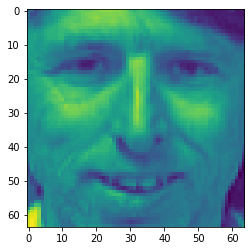

Face number 206 which contributes the most to the PCA feature number 2


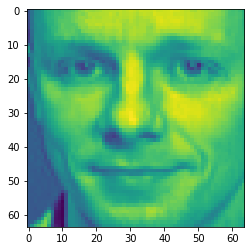

Face number 236 which contributes the most to the PCA feature number 3


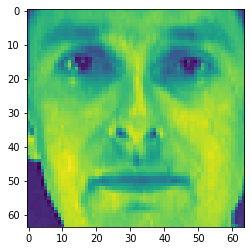

Face number 180 which contributes the most to the PCA feature number 4


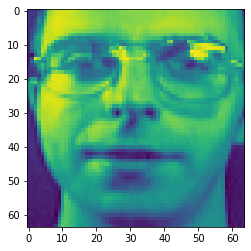

Face number 19 which contributes the most to the PCA feature number 5


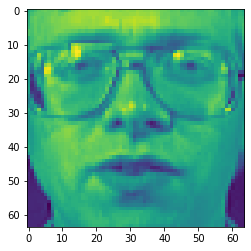

Face number 393 which contributes the most to the PCA feature number 6


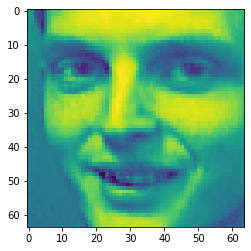

Face number 30 which contributes the most to the PCA feature number 7


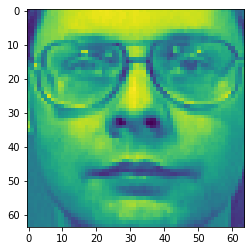

Face number 274 which contributes the most to the PCA feature number 8


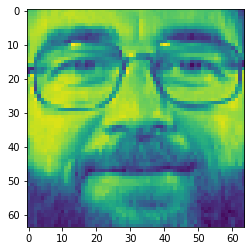

Face number 243 which contributes the most to the PCA feature number 9


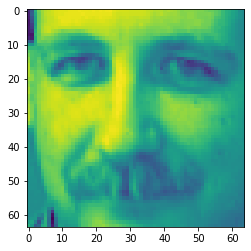

Face number 316 which contributes the most to the PCA feature number 10


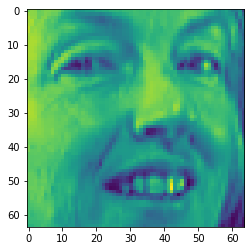

In [51]:
most_influence_to_components_args = np.argmax(contribution_to_the_components, axis=0)
image_shape = (64, 64)
for i in range (len(most_influence_to_components_args)):
    plt.imshow(faces.images[most_influence_to_components_args[i]])
    print("Face number {0} which contributes the most to the PCA feature number {1}".format(most_influence_to_components_args[i],i+1))
    plt.show()